In [1]:
! git clone https://github.com/gmalivenko/onnx2keras.git

Cloning into 'onnx2keras'...
remote: Enumerating objects: 940, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 940 (delta 270), reused 239 (delta 239), pack-reused 643
Receiving objects: 100% (940/940), 183.69 KiB | 6.12 MiB/s, done.
Resolving deltas: 100% (634/634), done.


# ONNX &rightarrow; Keras

In [2]:
import keras
import onnx
import os
import tensorflow as tf

from onnx2keras.onnx2keras import onnx_to_keras

In [3]:
data_dir = os.path.join('..', 'models')
onnx_model_filename = os.path.join(data_dir, 'myModel_ONNX')

onnx_model_input_names = ['featureInputLayer']

# Load ONNX model
onnx_model = onnx.load(
    onnx_model_filename
)

# Call the converter (input - is the main model input name, can be different for your model)
k_model = onnx_to_keras(
    onnx_model,
    onnx_model_input_names
)

INFO:onnx2keras:Converter is called.
DEBUG:onnx2keras:List input shapes:
DEBUG:onnx2keras:None
DEBUG:onnx2keras:List inputs:
DEBUG:onnx2keras:Input 0 -> fullyConnectedLayer1_MatMul_W.
DEBUG:onnx2keras:Input 1 -> fullyConnectedLayer1_Add_B.
DEBUG:onnx2keras:Input 2 -> batchNormalizationLayer_scale.
DEBUG:onnx2keras:Input 3 -> batchNormalizationLayer_B.
DEBUG:onnx2keras:Input 4 -> batchNormalizationLayer_mean.
DEBUG:onnx2keras:Input 5 -> batchNormalizationLayer_var.
DEBUG:onnx2keras:Input 6 -> fullyConnectedLayer3_MatMul_W.
DEBUG:onnx2keras:Input 7 -> fullyConnectedLayer3_Add_B.
DEBUG:onnx2keras:Input 8 -> fullyConnectedLayer4_MatMul_W.
DEBUG:onnx2keras:Input 9 -> fullyConnectedLayer4_Add_B.
DEBUG:onnx2keras:Input 10 -> featureInputLayer.
DEBUG:onnx2keras:List outputs:
DEBUG:onnx2keras:Output 0 -> softmaxLayer.
DEBUG:onnx2keras:Gathering weights to dictionary.
DEBUG:onnx2keras:Found weight fullyConnectedLayer1_MatMul_W with shape (474, 16).
DEBUG:onnx2keras:Found weight fullyConnectedLay

Tensor("Placeholder:0", shape=(None, 16), dtype=float32) Tensor("Placeholder_1:0", shape=(16,), dtype=float32)
Tensor("Placeholder:0", shape=(None, 16), dtype=float32) Tensor("Placeholder_1:0", shape=(16,), dtype=float32)


DEBUG:onnx2keras:Output TF Layer -> KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='fullyConnectedLayer4_Add/Add:0', description="created by layer 'fullyConnectedLayer4_Add'")
DEBUG:onnx2keras:######
DEBUG:onnx2keras:...
DEBUG:onnx2keras:Converting ONNX operation
DEBUG:onnx2keras:type: Softmax
DEBUG:onnx2keras:node_name: softmaxLayer
DEBUG:onnx2keras:node_params: {'axis': 1, 'change_ordering': False, 'name_policy': None}
DEBUG:onnx2keras:...
DEBUG:onnx2keras:Check if all inputs are available:
DEBUG:onnx2keras:Check input 0 (name fullyConnectedLayer4_Add).
DEBUG:onnx2keras:... found all, continue
DEBUG:onnx2keras:Output TF Layer -> KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='softmaxLayer/Softmax:0', description="created by layer 'softmaxLayer'")


Tensor("Placeholder:0", shape=(None, 8), dtype=float32) Tensor("Placeholder_1:0", shape=(8,), dtype=float32)


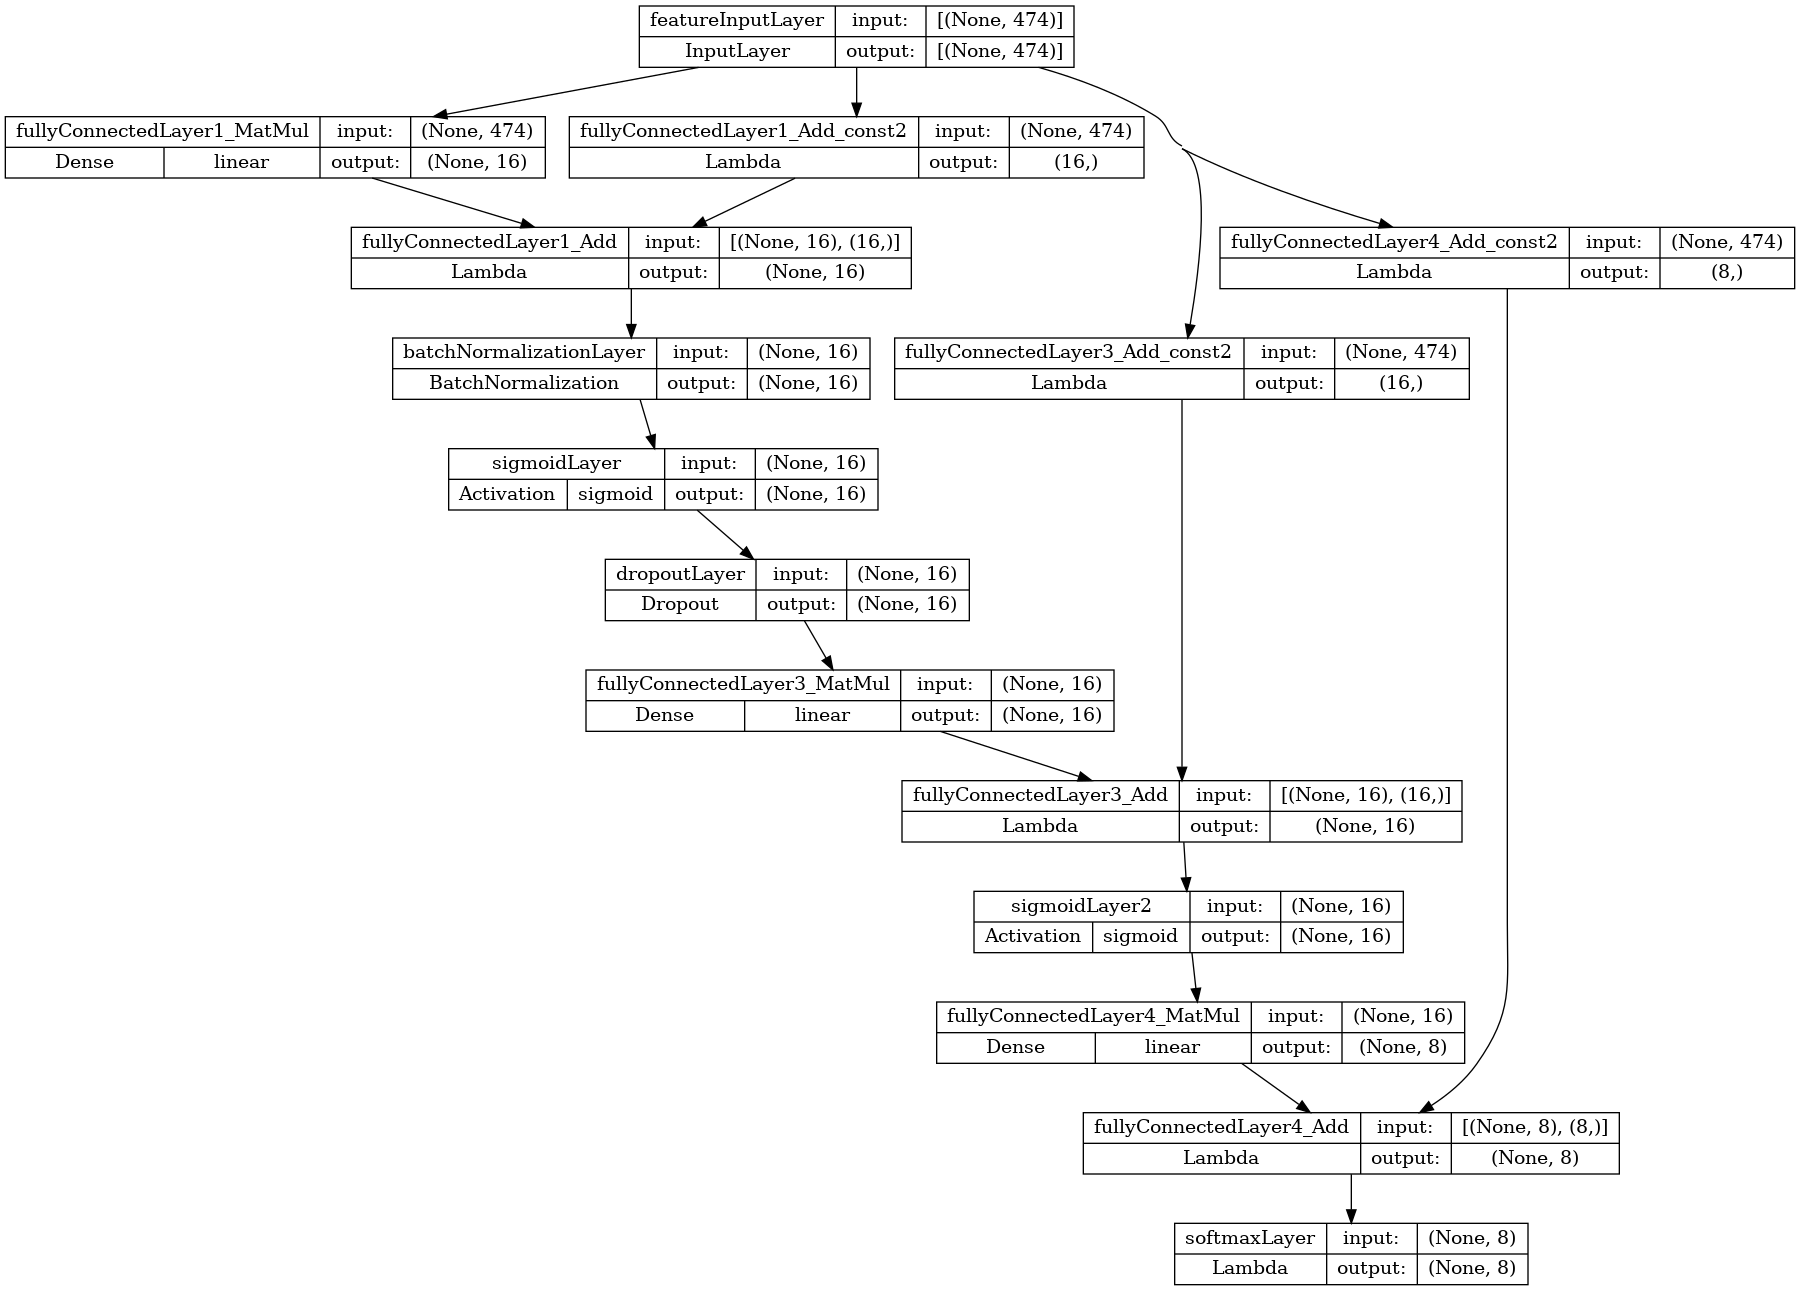

In [4]:
tf.keras.utils.plot_model(
    k_model,
    # to_file=os.path.basename(onnx_model_filename) + '.pdf',
    expand_nested=True,
    show_shapes=True,
    show_layer_activations=True
)